In [ ]:
## plotting CTD values from .cnv files 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd


In [3]:

def parse_cnv_file(filename):
    """Parse a Sea-Bird .cnv file into metadata and data."""
    metadata = {}
    data = []

    with open(filename, 'r') as file:
        for line in file:
            # Check for metadata (lines starting with '*')
            if line.startswith('*'):
                if '=' in line:
                    # Metadata key-value pair
                    key, value = line[1:].strip().split('=', 1)
                    metadata[key.strip()] = value.strip()
                else:
                    # Metadata comments without key-value
                    key = line[1:].strip()
                    metadata[key] = None
            elif line.startswith('#'):
                # Column headers start with '#'
                if 'name' in line:
                    _, col_index, col_name = line.strip().split(' ', 2)
                    metadata[f"Column_{col_index.strip()}"] = col_name.strip()
            else:
                # Data starts after metadata and column definitions
                data.append(line.strip())

    # Convert data into a DataFrame
    if data:
        data = [list(map(float, row.split())) for row in data if row]
        df = pd.DataFrame(data, columns=[metadata.get(f"Column_{i}", f"Column_{i}") for i in range(len(data[0]))])
    else:
        df = pd.DataFrame()

    return metadata, df

In [9]:
base = '/home/vboatwright/mnt/scienceparty_share/SR2503_scienceparty_share/CTD/'
base = '/media/vboatwright/KBZ/SR2503_scienceparty_share/CTD/SurveyStations/'
cruise = 'SR2503' 
castnumber = 1 
filename = f'{cruise}_cast_{castnumber:02d}_updown.cnv' # 2-digits for cast number
metadata, data = parse_cnv_file(base+filename)

print("Metadata:")
for key, value in metadata.items():
    print(f"{key}: {value}")

# Example: Show the first 5 rows of data
print("\nData:")
print(data.head())


temp1 = data['Column_0'].values
cond1 = data['Column_1'].values
density1 = data['Column_2'].values
depth1 = data['Column_3'].values
fluor1 = data['Column_4'].values
lat1 = data['Column_5'].values
lon1 = data['Column_6'].values
nitrogen1 = data['Column_7'].values
oxygen1 = data['Column_8'].values
salinity1 = data['Column_9'].values
flag1 = data['Column_10'].values



Metadata:
Sea-Bird SBE 9 Data File:: None
FileName: C:\CTD\2025\SR2503\SR2503_cast_01.hex
Software Version Seasave V 7.26.7.121: None
Temperature SN: 5046
Conductivity SN: 3057
Number of Bytes Per Scan: 40
Number of Voltage Words: 5
Number of Scans Averaged by the Deck Unit: 1
System UpLoad Time: Feb 21 2025 04:14:27
NMEA Latitude: 33 49.38 N
NMEA Longitude: 118 37.74 W
NMEA UTC (Time): Feb 21 2025  04:14:27
Store Lat/Lon Data: Append to Every Scan
SBE 11plus V 5.2: None
number of scans to average: 1
pressure baud rate: 9600
NMEA baud rate: 4800
surface PAR voltage added to scan: None
A/D offset: 0
GPIB address: 1
advance primary conductivity  0.073 seconds: None
advance secondary conductivity  0.073 seconds: None
autorun on power up is disabled: None
S>: None
* Ship: Sally Ride: None
* Cruise: St Lucia: None
* Station: Wildfire samples: None
* Cast: 01: None
* Operator: Kerstin: None
* Cast Type: Not full depth: None
System UTC: Feb 21 2025 04:14:27
Column_name: 16 = flag:  0.000e+00


In [6]:
# plot a little 

temp1 = data['Column_0'].values
cond1 = data['Column_1'].values
density1 = data['Column_2'].values
depth1 = data['Column_3'].values
fluor1 = data['Column_4'].values
lat1 = data['Column_5'].values
lon1 = data['Column_6'].values
nitrogen1 = data['Column_7'].values
oxygen1 = data['Column_8'].values
salinity1 = data['Column_9'].values
flag1 = data['Column_10'].values



In [7]:
base = '/home/vboatwright/mnt/scienceparty_share/SR2503_scienceparty_share/CTD/upcastdowncast/victoria/'
cruise = 'SR2503' 
castnumber = 1 
filename = f'{cruise}_cast_{castnumber:02d}_updown.cnv' # 2-digits for cast number
metadata, data = parse_cnv_file(base+filename)


In [31]:
data

,Column_0,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12,Column_13,Column_14,Column_15,Column_16
0,14.2495,35398.0,2.358,14.2215,40374.0,95.9624,1.00120,99.98,1.14160,6.0255,0.0,12.210012,0.0,0.006105,28.7919,33.3523,0.0
1,14.2475,35477.0,2.358,14.2216,40374.0,95.9624,0.92796,99.98,1.12080,6.0230,0.0,12.210012,0.0,0.006105,28.8640,33.3522,0.0
2,14.2472,35552.0,2.406,14.2215,40374.0,95.9624,0.90354,99.98,0.87109,6.0206,0.0,12.210012,0.0,0.006105,28.9319,33.3524,0.0
3,14.2456,35623.0,2.358,14.2215,40374.0,95.9624,1.00120,99.98,0.70118,6.0183,0.0,12.210012,0.0,0.006105,28.9972,33.3526,0.0
4,14.2434,35690.0,2.358,14.2213,40374.0,95.9624,1.01340,100.00,0.67224,6.0118,0.0,12.210012,0.0,0.006105,29.0600,33.3530,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49408,14.2370,40382.0,2.064,14.2366,40388.0,96.0149,0.73260,42.47,1.76400,8.1082,0.0,0.000000,0.0,0.006105,33.3460,33.3527,0.0
49409,14.2370,40382.0,2.064,14.2368,40389.0,96.0411,0.73260,42.42,0.99038,8.1082,0.0,12.210012,0.0,0.006105,33.3463,33.3529,0.0
49410,14.2372,40382.0,2.064,14.2371,40389.0,96.0411,0.73260,42.39,0.55897,8.1082,0.0,0.000000,0.0,0.006105,33.3463,33.3529,0.0
49411,14.2374,40382.0,2.064,14.2373,40390.0,96.0411,0.72039,42.39,0.49335,8.1082,0.0,0.000000,0.0,0.006105,33.3461,33.3531,0.0


In [15]:
metadata

{'Sea-Bird SBE 9 Data File:': None,
 'FileName': 'C:\\CTD\\2025\\SR2503\\SR2503_cast_01.hex',
 'Software Version Seasave V 7.26.7.121': None,
 'Temperature SN': '5046',
 'Conductivity SN': '3057',
 'Number of Bytes Per Scan': '40',
 'Number of Voltage Words': '5',
 'Number of Scans Averaged by the Deck Unit': '1',
 'System UpLoad Time': 'Feb 21 2025 04:14:27',
 'NMEA Latitude': '33 49.38 N',
 'NMEA Longitude': '118 37.74 W',
 'NMEA UTC (Time)': 'Feb 21 2025  04:14:27',
 'Store Lat/Lon Data': 'Append to Every Scan',
 'SBE 11plus V 5.2': None,
 'number of scans to average': '1',
 'pressure baud rate': '9600',
 'NMEA baud rate': '4800',
 'surface PAR voltage added to scan': None,
 'A/D offset': '0',
 'GPIB address': '1',
 'advance primary conductivity  0.073 seconds': None,
 'advance secondary conductivity  0.073 seconds': None,
 'autorun on power up is disabled': None,
 'S>': None,
 '* Ship: Sally Ride': None,
 '* Cruise: St Lucia': None,
 '* Station: Wildfire samples': None,
 '* Cast: 0

In [12]:
temp1 = data['Column_0'].values
cond1 = data['Column_1'].values
p = data['Column_2'].values
temp2 = data['Column_3'].values
cond2 = data['Column_4'].values
trans = data['Column_5'].values
fluoro = data['Column_6'].values
altimeter = data['Column_7'].values
PAR = data['Column_8'].values
oxygen = data['Column_9'].values
upv = data['Column_10'].values
SPAR = data['Column_11'].values
sal1 = data['Column_12'].values
sal2 = data['Column_13'].values
lon = data['Column_14'].values
lat = data['Column_15'].values
flag = data['Column_16'].values


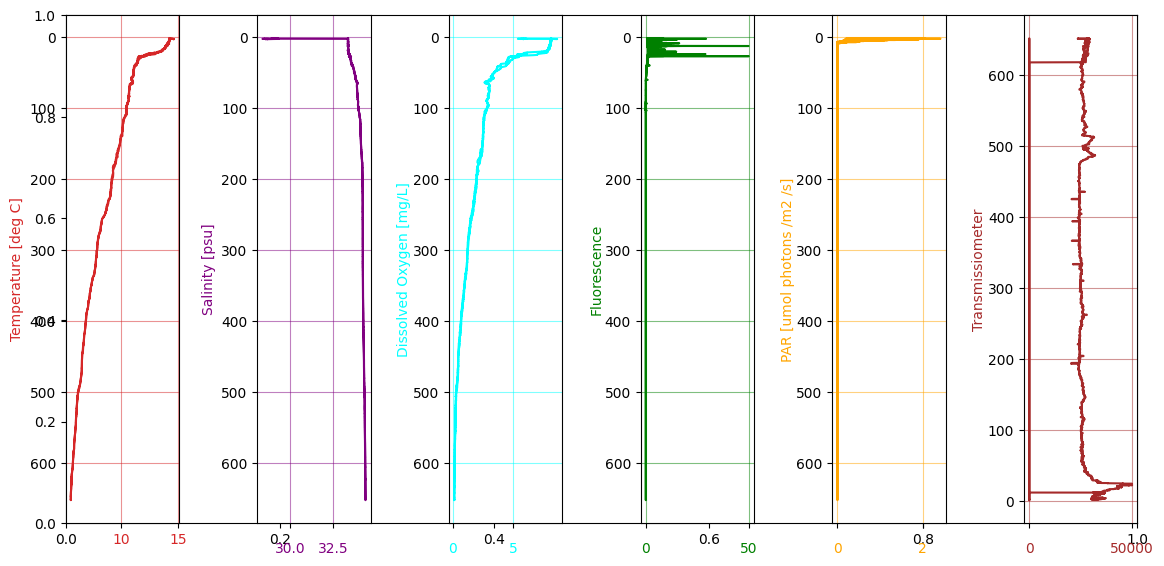

In [13]:

# plot to show
fig,ax0 = plt.subplots(figsize=(12,6))

ax0 = plt.subplot(1,6,1)
color = 'tab:red'
ax0.plot(temp1,p,color=color)
ax0.invert_yaxis()
ax0.set_ylabel('Depth [dbar]'); 
ax0.set_ylabel('Temperature [deg C]',color=color)
ax0.tick_params(axis='x', labelcolor=color)
ax0.grid(color=color,alpha=0.5)

#ax1 = ax0.twiny()
ax1 = plt.subplot(1,6,2)
color = 'purple'
ax1.plot(sal1,p,color=color)
ax1.invert_yaxis()
ax1.set_ylabel('Salinity [psu]',color=color,labelpad=4)
ax1.tick_params(axis='x', labelcolor=color, pad=10)
ax1.grid(color=color,alpha=0.5)

#ax2 = ax0.twiny()
ax2 = plt.subplot(1,6,3)
color = 'cyan'
ax2.plot(oxy,p,label='O2',color=color)
ax2.invert_yaxis()
ax2.set_ylabel('Dissolved Oxygen [mg/L]',color=color,labelpad=1)
ax2.tick_params(axis='x', labelcolor=color, pad=10)
ax2.grid(color=color,alpha=0.5)

#ax3 = ax2.twiny()
ax3 = plt.subplot(1,6,4)
color = 'green'
ax3.plot(fluoro,p,label='Fluoro',color=color)
ax3.invert_yaxis()
ax3.set_ylabel('Fluorescence',color=color,labelpad=1)
ax3.tick_params(axis='x', labelcolor=color, pad=10)
ax3.grid(color=color,alpha=0.5)


#ax4 = ax2.twiny()
ax4 = plt.subplot(1,6,5)
color = 'orange'
ax4.plot(PAR,p,color=color)
ax4.invert_yaxis()
ax4.set_ylabel('PAR [umol photons /m2 /s]',color=color,labelpad=1)
ax4.tick_params(axis='x', labelcolor=color, pad=10)
ax4.grid(color=color,alpha=0.5)


#ax5 = ax2.twiny()
ax5 = plt.subplot(1,6,6)
color = 'brown'
ax5.plot(upv,p,label='UPV',color=color)
ax5.invert_yaxis()
ax5.set_ylabel('UPV Scattering',color=color,labelpad=1)
ax5.tick_params(axis='x', labelcolor=color, pad=10)
ax5.grid(color=color,alpha=0.5)


#ax5 = ax2.twiny()
ax5 = plt.subplot(1,6,6)
color = 'brown'
ax5.plot(beam_trans,p,label='trans',color=color)
ax5.invert_yaxis()
ax5.set_ylabel('Transmissiometer',color=color,labelpad=1)
ax5.tick_params(axis='x', labelcolor=color, pad=10)
ax5.grid(color=color,alpha=0.5)

plt.tight_layout()
plt.show()


In [ ]:

base = '/home/vboatwright/mnt/scienceparty_share/SR2503_scienceparty_share/CTD/'
cruise = 'SR2503' 
castnumber = 1 
filename = f'{cruise}_cast_{castnumber:02d}.cnv' # 2-digits for cast number

metadata, data = parse_cnv_file(base+filename)

print("Metadata:")
for key, value in metadata.items():
    print(f"{key}: {value}")

# Example: Show the first 5 rows of data
print("\nData:")
print(data.head())


temp1 = data['Column_0'].values
cond1 = data['Column_1'].values
density1 = data['Column_2'].values
depth1 = data['Column_3'].values
fluor1 = data['Column_4'].values
lat1 = data['Column_5'].values
lon1 = data['Column_6'].values
nitrogen1 = data['Column_7'].values
oxygen1 = data['Column_8'].values
salinity1 = data['Column_9'].values
flag1 = data['Column_10'].values



In [ ]:
# process SR2503 files

base = '/home/vboatwright/mnt/scienceparty_share/SR2503_scienceparty_share/CTD/'
stn = 8 

for ii in np.arange(0,stn): 
    icast = ii+1 
    
    

metadata, data = parse_cnv_file(folder+filename)

# Example: Print metadata
print("Metadata:")
for key, value in metadata.items():
    print(f"{key}: {value}")

# Example: Show the first 5 rows of data
print("\nData:")
print(data.head())


temp1 = data['Column_0'].values
cond1 = data['Column_1'].values
density1 = data['Column_2'].values
depth1 = data['Column_3'].values
fluor1 = data['Column_4'].values
lat1 = data['Column_5'].values
lon1 = data['Column_6'].values
nitrogen1 = data['Column_7'].values
oxygen1 = data['Column_8'].values
salinity1 = data['Column_9'].values
flag1 = data['Column_10'].values

